<a href="https://colab.research.google.com/github/salmanromeo/CS_5783_Machine_Learning_Fall_2022/blob/main/CS_5783_Fall_2022_Assignment_5_Image_compression_KMeans/CS_5783_Fall_2022_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 4**

#####In this question, you will be using k-means to perform image compression. Implement a naïve version of the k-means algorithm based on your understanding. Your code must take the number of clusters k as input and perform k-means clustering on the given image. Once the algorithm finishes running, the cluster centroids represent the top-k common colors in the image. Iterate through each pixel in the image and assign the closest color to each pixel. Save and visualize the resulting image. For reading and writing images, you can use OpenCV, which is an open-source computer vision toolkit. The following code will load the image into a NumPy array. You can use this as input to your K-Means algorithm.
```
import cv2 
img = cv2.imread(‘input.png’) 
height, width, channels = np.shape(img) 
for i in width: 
  for j in height: 
    pixel = img[j][i] # Read the pixel at location (i,j) 
    img[j][i] = newValue # Assign a new value to the pixel
```
#####Note: You cannot use any library for k-means. You can only use OpenCV or other equivalent library to load images.

**Answer 4**

**Libraries**

In [1]:
import numpy as np 
from skimage import io
import numpy.matlib
import random
import os

**Loading image and pixel details**

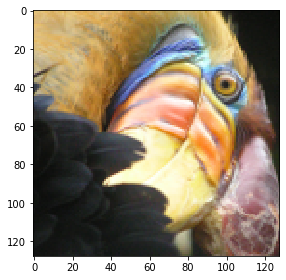

Data type: uint8
Height of image: 128
Width of image: 128
Number of channels of the image: 3
Pixels: [[[219 180 103]
  [230 185 116]
  [226 186 110]
  ...
  [ 14  15  13]
  [ 13  15  12]
  [ 12  14  12]]

 [[230 193 119]
  [224 192 120]
  [226 192 124]
  ...
  [ 16  16  13]
  [ 14  15  10]
  [ 11  14   9]]

 [[228 191 123]
  [228 191 121]
  [220 185 118]
  ...
  [ 14  16  13]
  [ 13  13  11]
  [ 11  15  10]]

 ...

 [[ 15  18  16]
  [ 18  21  18]
  [ 18  19  16]
  ...
  [ 81  45  45]
  [ 70  43  35]
  [ 72  51  43]]

 [[ 16  17  17]
  [ 17  18  19]
  [ 20  19  20]
  ...
  [ 80  38  40]
  [ 68  39  40]
  [ 59  43  42]]

 [[ 15  19  19]
  [ 20  20  18]
  [ 18  19  17]
  ...
  [ 65  43  39]
  [ 58  37  38]
  [ 52  39  34]]]


In [2]:
img = io.imread('/content/drive/MyDrive/input.png')
io.imshow(img)
io.show()
# Check the image matrix data type (could know the bit depth of the image)
print("Data type:", img.dtype)
# Check the height of image 
print("Height of image:",img.shape[0])
# Check the width of image 
print("Width of image:",img.shape[1])
# Check the number of channels of the image
print("Number of channels of the image:",img.shape[2])
print("Pixels:",img)

In [3]:
# Flattening the image
rows = img.shape[0]
cols = img.shape[1]
img = img/255
X = img.reshape(img.shape[0]*img.shape[1], 3)
print(len(X))

16384


**Input the number clusters**

In [4]:
K = int(input("Please enter number of clusters: "))

Please enter number of clusters: 10


**Kmeans Algorithm**

In [5]:
# For random centroid initialization
def initKCentroids(X,K):
    rand_centroids = random.sample(list(X),K)
    return rand_centroids

In [6]:
# Returning the centroid number/index closest to the respective 
def findClosestCentroids(point,rand_centroids):
    K = np.size(rand_centroids,0)
    idx = np.zeros((np.size(point,0),1))
    x = np.empty((np.size(point,0),1))
    for i in range(K):
        j = rand_centroids[i]
        var = np.ones((np.size(point,0),1))*j
        sub = np.subtract(point,var)
        var_1 = np.power(sub,2)
        var_2 = np.sum(var_1,axis = 1)
        var_2 = np.asarray(var_2)
        var_2.resize((np.size(point,0),1))
        x = np.append(x, var_2, axis=1)
    x = np.delete(x,0,axis=1)
    idx = np.argmin(x, axis=1)
    return idx

In [7]:
# This computes the new centroid and updates the same
def computeCentroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        var = idx ==i
        #print(var)
        var = var.astype(int)
        total_num = sum(var);
        var.resize((np.size(X,0),1))
        total_mat = np.matlib.repmat(var,1,n)
        var = np.transpose(var)
        total = np.multiply(X,total_mat)
        centroids[i] = (1/total_num)*np.sum(total,axis=0)
    return centroids

In [8]:
# Main KMeans Function that takes in initial Centroids and returns the final updated centroids after given iterations along with that, returns the index of each input feature belonging to a respective centroids
# KMeans for Image Compression 
def KMeans_Image(X,initial_centroids,num_iteration):
    m = np.size(X,0)
    n = np.size(X,1)
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    ix = np.zeros((m,1))
    for i in range(1,num_iteration):
        ix = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X,ix,K)
    return centroids,ix

In [9]:
# Running the KMeans clustering algorithm for 50 iterations
num_iters = 50
centroids, idx = KMeans_Image(X,initKCentroids(X,K),num_iters)
print(centroids)

[[0.97406884 0.91668807 0.75552273]
 [0.86834578 0.72703665 0.47837867]
 [0.41656881 0.34100196 0.29218055]
 [0.62082587 0.54072198 0.47576938]
 [0.62320859 0.45587126 0.2170822 ]
 [0.093106   0.10038079 0.09039552]
 [0.77613038 0.73700205 0.7446475 ]
 [0.44094036 0.53222462 0.72267734]
 [0.82082649 0.59643444 0.30246193]
 [0.21777393 0.20507958 0.19718339]]


In [10]:
idx = findClosestCentroids(X,centroids)
img_compressed = centroids[idx]
print(np.shape(img_compressed))
img_compressed = np.reshape(img_compressed, (rows, cols, 3))
print(np.shape(img_compressed))

(16384, 3)
(128, 128, 3)


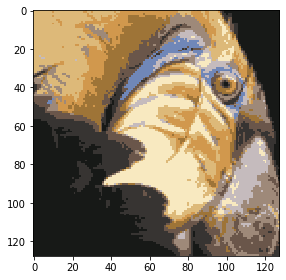

In [11]:
io.imshow(img_compressed)
io.show()
io.imsave('/content/drive/MyDrive/input_compressed.jpg', img_compressed)

In [12]:
# showing the image size before and after compression
input = os.stat('/content/drive/MyDrive/input.png')
print("Image size before compression: ",input.st_size/1024,"KB")
output = os.stat('/content/drive/MyDrive/input_compressed.jpg')
print("Image size after compression: ",output.st_size/1024,"KB")

Image size before compression:  32.2568359375 KB
Image size after compression:  4.654296875 KB
